<a href="https://colab.research.google.com/github/PanitnanKan/BADS7105-CRM-analysis-and-intelligence/blob/main/Homework%2007/Homework_7_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=14)


In [3]:
surv_data = pd.read_excel('Customer Preference Survey (การตอบกลับ).xlsx',engine='openpyxl')
surv_data.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0,0,0.0,0,0,1,1,1
1,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0,0,1.0,1,0,1,0,1
2,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0,0,0.0,1,0,1,1,1
3,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0,0,0.0,0,0,0,0,1
4,2021-03-20 11:54:18.477,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0.0,1,0,1,0,0,1,0,0,0,0.0,1,0,1,NaN,0,0,0,1,0,0.0,1,0,1,1,1


In [4]:
surv_data.drop(columns=['เครื่องย่อยเศษอาหาร.1', 'ประทับเวลา'],inplace = True)

In [5]:
df=surv_data.dropna()
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0,0,0.0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0,0,0.0,1,0,1,1,1


### Item Hit

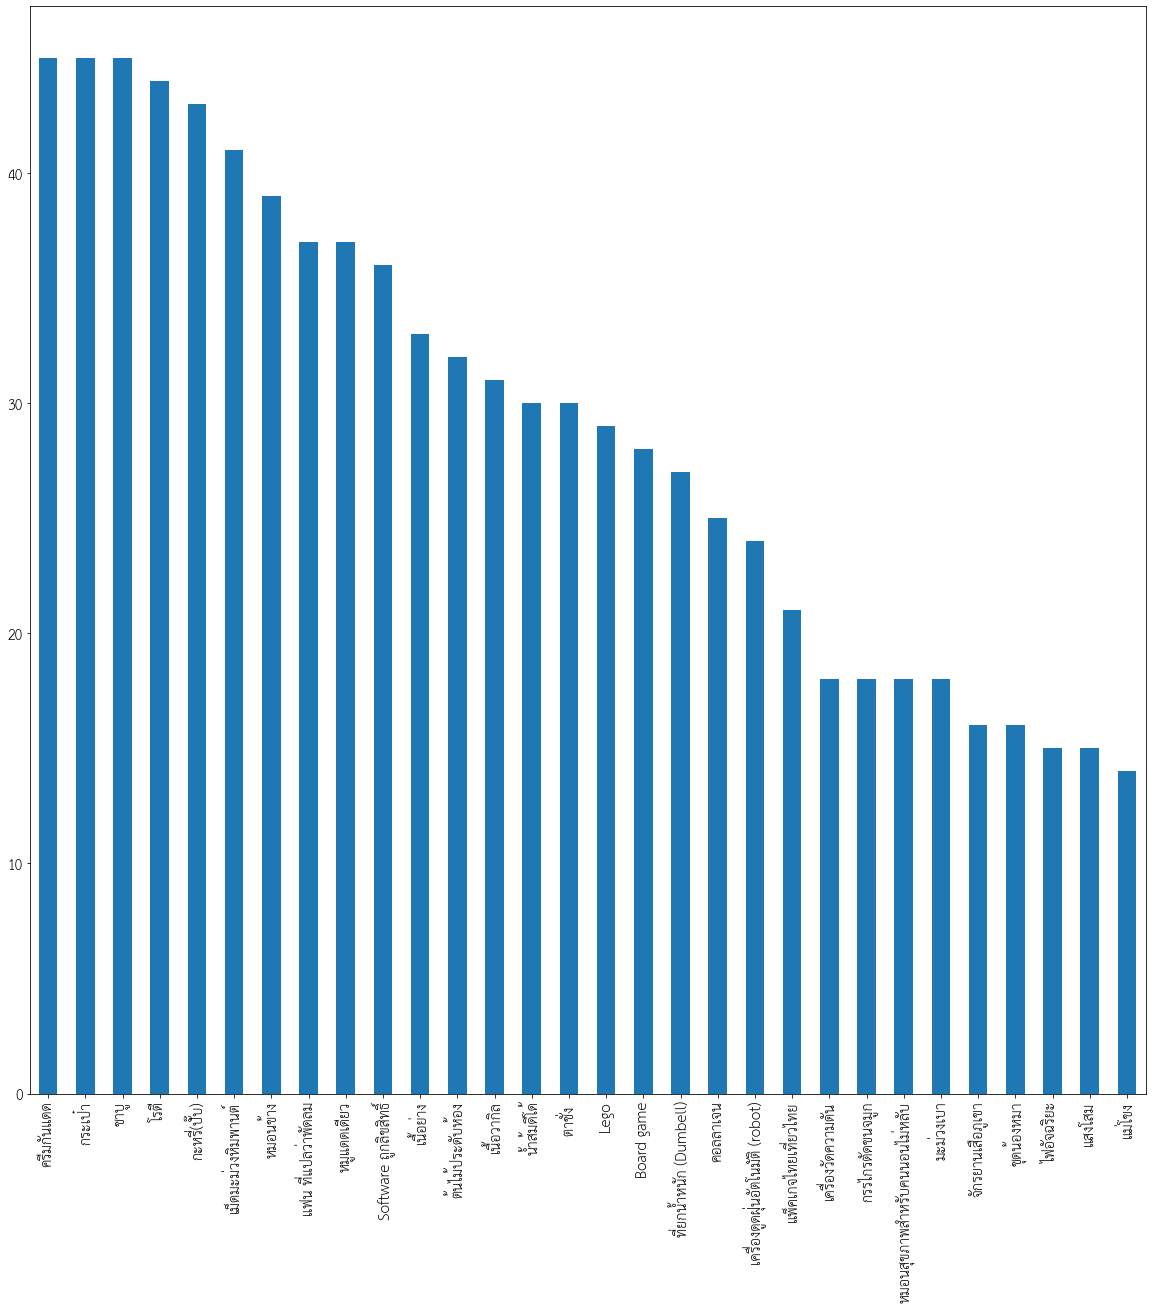

In [6]:
hit = surv_data.sum(axis=0).sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
hit.head(30).plot(kind = "bar")

### Model use KNN

In [98]:
df_tran = df.T
df_tran.head()

,0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
จักรยานเสือภูเขา,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
คอลลาเจน,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
Brownie อวกาศ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
แม่โขง,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Botox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df_tran.replace({1: 3}, inplace=True)
df_tran1 = df_tran.copy()

In [100]:
def product_recommender(user, num_neighbors, num_recommendation):

  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df_tran.values)
  distances, indices = knn.kneighbors(df_tran.values, n_neighbors=number_neighbors)

  user_index = df_tran.columns.tolist().index(user)

  for p,t in list(enumerate(df.index)):
    if df_tran.iloc[p, user_index] == 0:
      sim_product = indices[p].tolist()
      product_distances = distances[p].tolist()
    
      if p in sim_product:
        id_product = sim_product.index(p)
        sim_product.remove(p)
        product_distances.pop(id_product) 

      else:
        sim_product = sim_product[:n_neighbors-1]
        product_distances = product_distances[:n_neighbors-1]
           
      product_similarity = [1-x for x in product_distances]
      product_similarity_copy = product_similarity.copy()
      nominator = 0

      for s in range(0, len(product_similarity)):
        if df_tran.iloc[sim_product[s], user_index] == 0:
          if len(product_similarity_copy) == (number_neighbors - 1):
            product_similarity_copy.pop(s)
          
          else:
            product_similarity_copy.pop(s-(len(product_similarity)-len(product_similarity_copy)))
            
        else:
          nominator = nominator + product_similarity[s]*df_tran.iloc[sim_product[s],user_index]
          
      if len(product_similarity_copy) > 0:
        if sum(product_similarity_copy) > 0:
          predicted_r = nominator/sum(product_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df_tran1.iloc[p,user_index] = predicted_r
  recommend_product_show(user, num_recommendation)

In [101]:
def recommend_product_show(user, num_recommended_product):
  print('The list of the product user {} Has bought \n'.format(user))
  for m in df_tran[df_tran[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_product = []
  for p in df_tran[df_tran[user] == 0].index.tolist():

    index_df = df_tran.index.tolist().index(p)
    predicted_rating = df_tran1.iloc[index_df, df_tran1.columns.tolist().index(user)]
    recommended_product.append((p, predicted_rating))

  sorted_rm = sorted(recommended_product, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended product \n')
  rank = 1
  for recommended_product in sorted_rm[:num_recommended_product]:
    
    print('{}: {}'.format(rank, recommended_product[0], recommended_product[1]))
    rank = rank + 1

In [102]:
product_recommender(12, 5, 5)

The list of the product user 12 Has bought 

ตาชั่ง 
กะหรี่(ปั๊บ)
แฟน ที่แปลว่าพัดลม
เนื้อวากิล
หมูแดดเดียว
เนื้อย่าง
กระเป๋า
ชาบู
Board game
เม็ดมะม่วงหิมพานต์
โรตี
แพ็คเกจไทยเที่ยวไทย
น้ำส้มดีโด้
Software ถูกลิขสิทธิ์
ครีมกันแดด


The list of the Recommended product 

1: เครื่องวัดความดัน
2: ไฟอัจฉริยะ
3: จักรยานเสือภูเขา
4: แม่โขง
5: ต้นไม้ประดับห้อง


In [106]:
product_recommender(17, 5, 5)

The list of the product user 17 Has bought 

แม่โขง
เครื่องวัดความดัน
หลอดไฟเปลี่ยนสีได้
เก้าอี้นวดไฟฟ้า
ต้นไม้ประดับห้อง
หมอนข้าง
ตาชั่ง 
แสงโสม
กะหรี่(ปั๊บ)
แฟน ที่แปลว่าพัดลม
เนื้อวากิล
หมูแดดเดียว
เนื้อย่าง
กระเป๋า
ชาบู
Board game
เม็ดมะม่วงหิมพานต์
กรรไกรตัดขนจมูก
โรตี
เกมส์ FIFA Online
น้ำส้มดีโด้
Software ถูกลิขสิทธิ์
ครีมกันแดด


The list of the Recommended product 

1: เครื่องดูดฝุ่นอัตโนมัติ (robot)
2: Omakase
3: จักรยานเสือภูเขา
4: กัญชา
5: คอร์ส bikini wax
